In [2]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf  # Import TensorFlow directly
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19 , preprocess_input, decode_predictions

In [5]:
os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")

['Potato___Early_blight',
 'Tomato___Bacterial_spot',
 'Tomato___healthy',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Target_Spot',
 'Cherry_(including_sour)___healthy',
 'Grape___Black_rot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Potato___Late_blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Corn_(maize)___healthy',
 'Apple___Black_rot',
 'Potato___healthy',
 'Soybean___healthy',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Peach___healthy',
 'Strawberry___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___Cedar_apple_rust',
 'Raspberry___healthy',
 'Blueberry___healthy',
 'Apple___Apple_scab',
 'Tomato___Early_blight',
 'Grape___healthy',
 'Pepper,_bell___healthy',
 'Squash___Powdery_mildew',
 'Peach___Bacterial

In [6]:
len(os.listdir("/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [7]:
train_datagen = ImageDataGenerator(zoom_range =0.5,shear_range=0.3,horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen= ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
train= train_datagen.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
 target_size=(256,256)
 ,batch_size=32 )

val =val_datagen.flow_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid" ,
   target_size=(256,256)
   ,batch_size=32 )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
t_img, label = next(train)

In [10]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    plt.show()

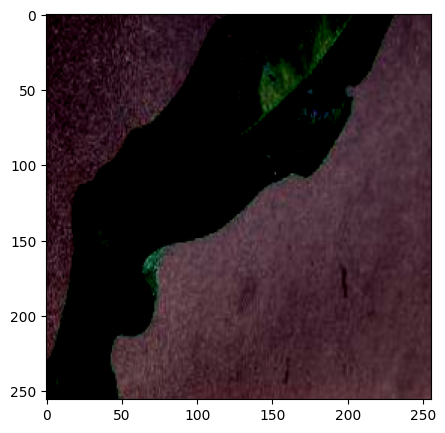

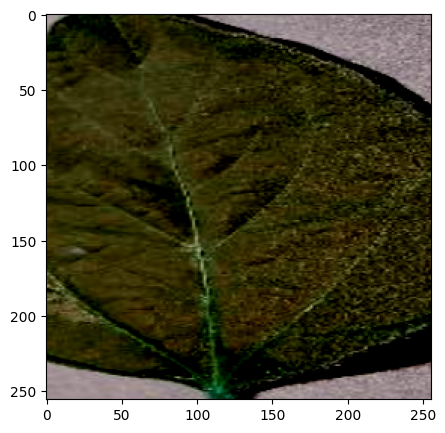

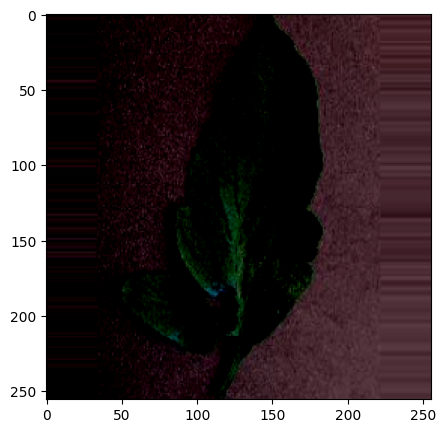

In [11]:
plotImage(t_img[:3],label[:3])

In [12]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [13]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
for layer in base_model.layers:
  layer.trainable = False

In [15]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [16]:
X=Flatten()(base_model.output)

X=Dense(units=38,activation='softmax')(X)

#creating model
model=model=Model(base_model.input,X)


In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,269,606 (81.14 MB)

 Trainable params: 1,245,222 (4.75 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [18]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#early stopping
es=EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience=3, verbose=1)

#model check point
mc = ModelCheckpoint(filepath="best_model.keras",  # Change the extension to .keras
                     monitor='val_accuracy',
                     save_best_only=True,
                     mode='max')
cb=[es,mc]

In [20]:
his = model.fit(train,
                steps_per_epoch=16,
                epochs=50,
                verbose=1,
                callbacks=cb,
                validation_data=val,
                validation_steps=16)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 796ms/step - accuracy: 0.1099 - loss: 27.9840 - val_accuracy: 0.4863 - val_loss: 13.2505
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 739ms/step - accuracy: 0.4345 - loss: 15.1400 - val_accuracy: 0.6016 - val_loss: 9.3215
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 730ms/step - accuracy: 0.5081 - loss: 12.6151 - val_accuracy: 0.6445 - val_loss: 7.9846
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 682ms/step - accuracy: 0.5867 - loss: 9.7711 - val_accuracy: 0.6035 - val_loss: 13.1969
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 720ms/step - accuracy: 0.6181 - loss: 12.2331 - val_accuracy: 0.7344 - val_loss: 6.8804
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 631ms/step - accuracy: 0.6564 - loss: 9.7428 - val_accuracy: 0.6934 - val_loss: 8.8738
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 709ms/step - accuracy: 0.6723 - loss: 8.0635 - val_accuracy: 0.6875 - val_loss: 10.2102
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 674ms/step - accuracy: 0.6408 - loss: 9.5160 - val_accuracy

In [21]:
h= his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

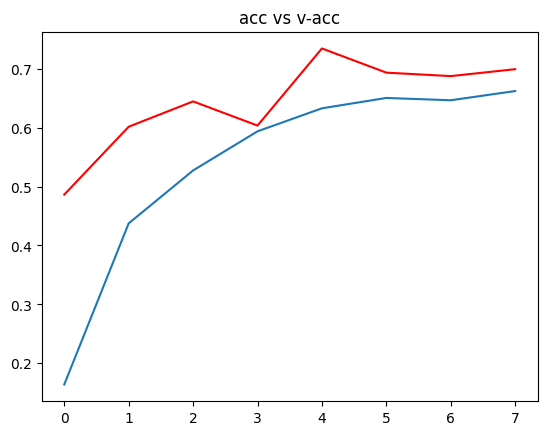

In [22]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

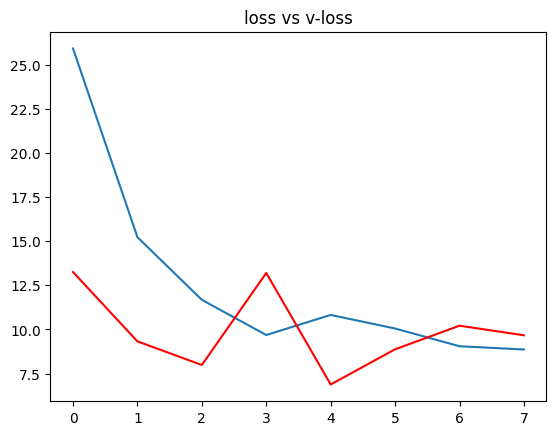

In [23]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v-loss')
plt.show()

In [25]:
#loading best model
from keras.models import load_model
model = load_model('/content/best_model.keras')

In [27]:
acc = model.evaluate(val)[1]

print(f"The accuracy of the model is = {acc*100} %")

550/550 ━━━━━━━━━━━━━━━━━━━━ 120s 214ms/step - accuracy: 0.7338 - loss: 6.7960
The accuracy of the model is = 73.01388382911682 %


In [44]:
print(type(train))
if hasattr(train, 'class_indices'):
    print(train.class_indices)
    # If it's a dictionary, create the reversed dictionary
    ref = dict(zip(train.class_indices.values(), train.class_indices.keys()))
    print(ref)
else:
    print("The 'train' object does not have a 'class_indices' attribute.")

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28,

In [45]:
def prediction(path):
  img = load_img(path,target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)

  pred=np.argmax(model.predict(img))
  print(f"The image belongs to { ref[pred]} ")




In [46]:
path="/content/test/test/AppleCedarRust4.JPG"
prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The image belongs to Apple___Cedar_apple_rust 
